In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
print(os.listdir('../input/'))

['food-adulteration-dataset', 'food-adulteration-new-data']


In [2]:
pip install --upgrade seaborn 


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/kaggle/input/food-adulteration-dataset/food_adulteration_data.csv')

In [4]:
df.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
0,1,Butter,BrandB,Meat,Artificial sweeteners,5/11/2024,Microbiological Analysis,Moderate,Low,Product Recall
1,2,Chicken,BrandC,Dairy,Coloring agents,5/23/2024,Sensory Evaluation,Severe,Medium,Warning Issued
2,3,Yogurt,BrandC,Meat,Artificial sweeteners,2/17/2024,Sensory Evaluation,Severe,High,Investigation Launched
3,4,Wine,BrandB,Beverages,Coloring agents,5/16/2024,Spectroscopy,Minor,Medium,Product Recall
4,5,Bread,BrandD,Dairy,Water,6/6/2024,Chemical Analysis,Severe,Medium,Warning Issued


In [5]:
df.isnull().sum()

adulteration_id     0
product_name        0
brand               0
category            0
adulterant          0
detection_date      0
detection_method    0
severity            0
health_risk         0
action_taken        0
dtype: int64

In [6]:
df_category = df.category.unique()
df_adulterant = df.adulterant.unique()
df_health_risk = df.health_risk.unique()
print(df_adulterant)
print(df_category)
print(df_health_risk)


['Artificial sweeteners' 'Coloring agents' 'Water' 'Melamine' 'Chalk']
['Meat' 'Dairy' 'Beverages' 'Bakery' 'Condiments']
['Low' 'Medium' 'High']


In [7]:
df = df.drop("detection_date",axis = 1)
df = df.drop("adulteration_id",axis = 1)
df

,product_name,brand,category,adulterant,detection_method,severity,health_risk,action_taken
0,Butter,BrandB,Meat,Artificial sweeteners,Microbiological Analysis,Moderate,Low,Product Recall
1,Chicken,BrandC,Dairy,Coloring agents,Sensory Evaluation,Severe,Medium,Warning Issued
2,Yogurt,BrandC,Meat,Artificial sweeteners,Sensory Evaluation,Severe,High,Investigation Launched
3,Wine,BrandB,Beverages,Coloring agents,Spectroscopy,Minor,Medium,Product Recall
4,Bread,BrandD,Dairy,Water,Chemical Analysis,Severe,Medium,Warning Issued
...,...,...,...,...,...,...,...,...
995,Butter,BrandD,Beverages,Artificial sweeteners,Chemical Analysis,Minor,Medium,Fine Imposed
996,Beef,BrandD,Beverages,Melamine,Microbiological Analysis,Minor,Medium,Warning Issued
997,Bread,BrandD,Dairy,Chalk,Microbiological Analysis,Moderate,High,Fine Imposed
998,Juice,BrandE,Beverages,Chalk,Spectroscopy,Minor,High,Product Recall


In [18]:
## Corrected the category column using MS-EXCEL

df = pd.read_csv('/kaggle/input/food-adulteration-new-data/food_adulteration_data  final file.csv')
df.head()

,product_name,brand,category,adulterant,detection_method,severity,health_risk,action_taken
0,Butter,BrandB,Dairy,Artificial sweeteners,Microbiological Analysis,Moderate,Low,Product Recall
1,Chicken,BrandC,Meat,Coloring agents,Sensory Evaluation,Severe,Medium,Warning Issued
2,Yogurt,BrandC,Dairy,Artificial sweeteners,Sensory Evaluation,Severe,High,Investigation Launched
3,Wine,BrandB,Beverages,Coloring agents,Spectroscopy,Minor,Medium,Product Recall
4,Bread,BrandD,Dairy,Water,Chemical Analysis,Severe,Medium,Warning Issued


## Highest used adulterant is coloring agents

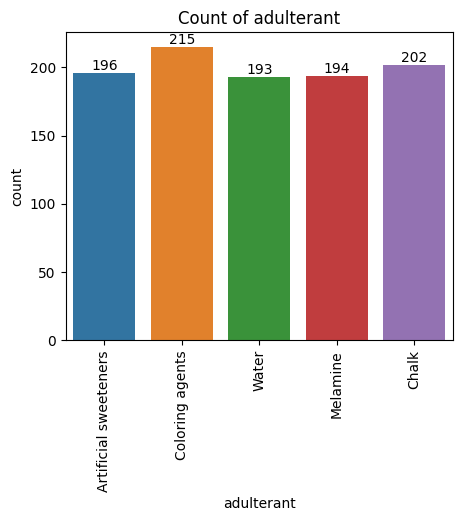

In [9]:
plot.figure(figsize=(5,4))
plot.title("Count of adulterant")
plot.xlabel("adulterant")
plot.ylabel("Count")

ax = sns.countplot(x=df['adulterant'],width=0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for label in ax.containers:
                   ax.bar_label(label)

plot.show()

In [10]:
# Unique values in the health_risk column
print(df['health_risk'].unique())

# Check the data type of the column
print(df['health_risk'].dtype)


['Low' 'Medium' 'High']
object


In [23]:
## Converting low,medium,high into 1,2,3 respectively

df['health_risk'] = np.where(df['health_risk'] == 'Low', 1,df['health_risk'])
df['health_risk'] = np.where(df['health_risk'] == 'Medium', 2,df['health_risk'])
df['health_risk'] = np.where(df['health_risk'] == 'High', 3,df['health_risk'])
df['health_risk'] = df['health_risk'].astype(int)


In [15]:
health_risk_summary=df.groupby('adulterant')['health_risk'].mean()
health_risk_summary

adulterant
Artificial sweeteners    1.954082
Chalk                    2.014851
Coloring agents          1.934884
Melamine                 2.030928
Water                    1.901554
Name: health_risk, dtype: float64

## Highlighting the adulterant with highest health risk 

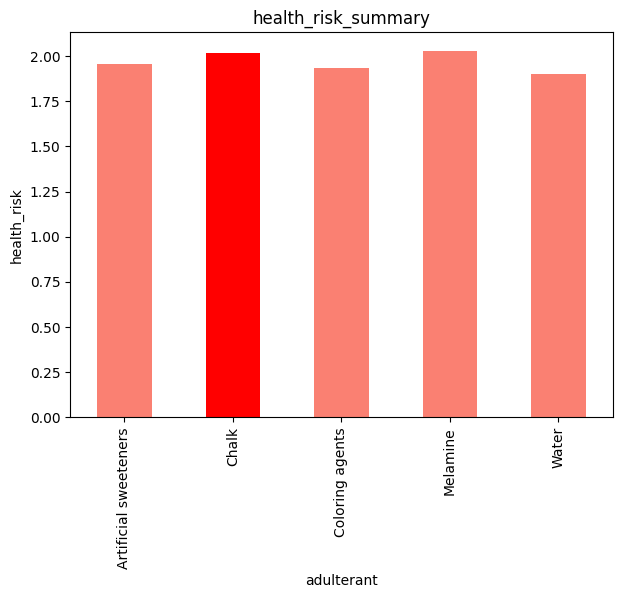

In [16]:
plot.figure(figsize=(7,5))
plot.title("health_risk_summary")
plot.xlabel("adulterant")
plot.ylabel("health_risk")

health_risk_summary.plot.bar(color=['salmon','red','salmon','salmon','salmon'])
plot.show()

#  Dairy products are added with high number of adulterants as shown below

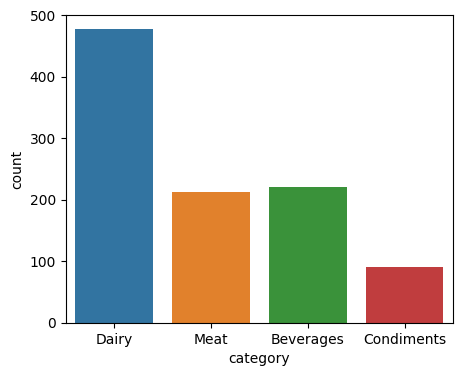

In [22]:
plot.figure(figsize=(5,4))
ax=sns.countplot(data=df,x='category')
plot.show()

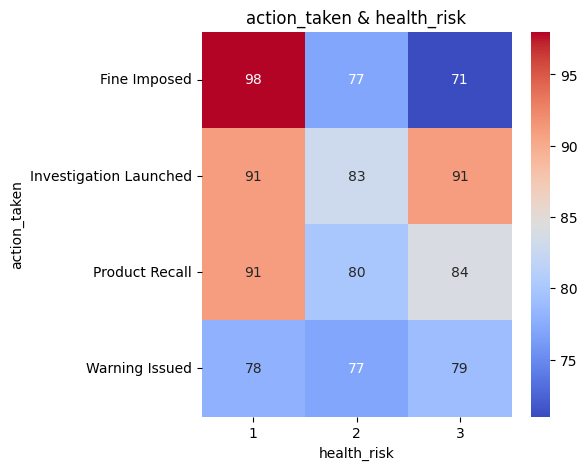

In [60]:
## Action_taken on the basis of heallth_risk


plot.figure(figsize=(5,5))
cross_tab =pd.crosstab(df['action_taken'],df['health_risk'])
sns.heatmap(cross_tab,annot=True,cmap='coolwarm')
plot.title("action_taken & health_risk")
plot.xlabel("health_risk")
plot.ylabel("action_taken")
plot.show()


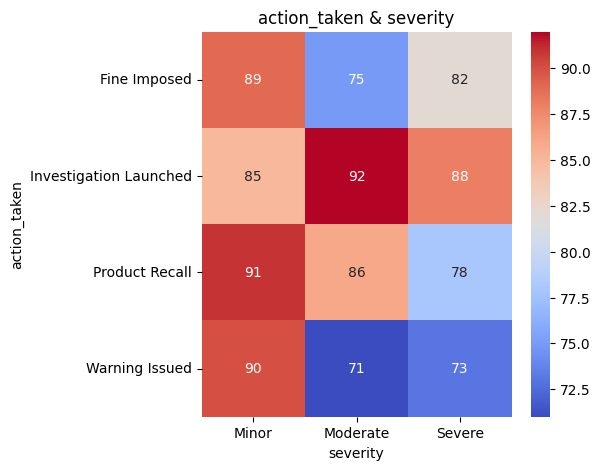

In [61]:
## Action_taken on the basis of severity


plot.figure(figsize=(5,5))
cross_tab =pd.crosstab(df['action_taken'],df['severity'])
sns.heatmap(cross_tab,annot=True,cmap='coolwarm')
plot.title("action_taken & severity")
plot.xlabel("severity")
plot.ylabel("action_taken")
plot.show()
